Wczytanie i przygotowanie danych

In [17]:
import os
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt



In [ ]:
print(*[filename.removesuffix(".json") for filename in os.listdir("./opinions")],sep="\n")

In [10]:
# Wczytanie danych z pliku .json do obiektu przypominającego tabelę
product_id = input("Podaj kod produktu: ")
reviews = pd.read_json(f"./opinions/{product_id}.json").set_index("review_id")
reviews


,author,recommendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
7768646,Aleksander,Polecam,5/5,"Kawa jest świetna, jedna z najlepszych kaw roz...","[aromat, delikatność, jakość, smak]",[],4,1,2018-03-27 13:13:41,None
12001850,Użytkownik Ceneo,Polecam,5/5,Super.Od jakiegoś czasu kawa zaparzana mi szko...,[],[],1,0,2020-03-27 15:15:49,2020-03-24 20:39:37
11023965,A...a,Polecam,5/5,"Zamawiamy tą kawę rozpuszczalną, bo smakowo na...",[],[],1,0,2019-09-10 11:01:48,2019-09-05 12:54:54
10608253,A...a,Polecam,5/5,"Zamawiamy tą kawę rozpuszczalną dodatkowo, bo ...",[],[],1,0,2019-06-03 10:16:32,2019-05-09 11:06:05
6467497,Użytkownik Ceneo,Polecam,5/5,"Kawa o wyjątkowym aromacie, idealna na spotkan...","[aromat, jakość, smak]",[],1,2,2018-01-12 18:33:22,2017-12-27 08:54:39
6681071,Krzysztof,Polecam,5/5,Zazwyczaj kupuję tylko Jacobs cronat gold lub ...,[],[],1,0,2018-03-07 10:38:06,2018-02-09 21:38:55
10846302,A...a,Polecam,5/5,"Dobra kawa, spełnia wszystkie potrzeby, jest s...",[],[],1,0,2019-07-29 09:43:45,2019-07-19 15:56:40
8880147,JUSTYNA,Polecam,5/5,Delikatny smak i cudowny aromat,[],[],1,0,2019-01-07 14:10:31,2018-12-13 16:08:29
2679551,jssi,Polecam,5/5,Aromatyczna kawa prosto z Niemiec. Estetyczne ...,[],[],1,1,2014-08-06 22:01:49,2014-07-23 08:57:57


In [11]:
# transformacja danych
reviews.stars = reviews.stars.apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)
reviews.likes = reviews.likes.astype(int)
reviews.dislikes = reviews.dislikes.astype(int)



In [12]:
reviews

,author,recommendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
7768646,Aleksander,Polecam,5.0,"Kawa jest świetna, jedna z najlepszych kaw roz...","[aromat, delikatność, jakość, smak]",[],4,1,2018-03-27 13:13:41,None
12001850,Użytkownik Ceneo,Polecam,5.0,Super.Od jakiegoś czasu kawa zaparzana mi szko...,[],[],1,0,2020-03-27 15:15:49,2020-03-24 20:39:37
11023965,A...a,Polecam,5.0,"Zamawiamy tą kawę rozpuszczalną, bo smakowo na...",[],[],1,0,2019-09-10 11:01:48,2019-09-05 12:54:54
10608253,A...a,Polecam,5.0,"Zamawiamy tą kawę rozpuszczalną dodatkowo, bo ...",[],[],1,0,2019-06-03 10:16:32,2019-05-09 11:06:05
6467497,Użytkownik Ceneo,Polecam,5.0,"Kawa o wyjątkowym aromacie, idealna na spotkan...","[aromat, jakość, smak]",[],1,2,2018-01-12 18:33:22,2017-12-27 08:54:39
6681071,Krzysztof,Polecam,5.0,Zazwyczaj kupuję tylko Jacobs cronat gold lub ...,[],[],1,0,2018-03-07 10:38:06,2018-02-09 21:38:55
10846302,A...a,Polecam,5.0,"Dobra kawa, spełnia wszystkie potrzeby, jest s...",[],[],1,0,2019-07-29 09:43:45,2019-07-19 15:56:40
8880147,JUSTYNA,Polecam,5.0,Delikatny smak i cudowny aromat,[],[],1,0,2019-01-07 14:10:31,2018-12-13 16:08:29
2679551,jssi,Polecam,5.0,Aromatyczna kawa prosto z Niemiec. Estetyczne ...,[],[],1,1,2014-08-06 22:01:49,2014-07-23 08:57:57


Podstawowe statystyki

In [14]:
review_count = reviews.shape[0]
pros_count = reviews.pros.astype(bool).sum()
cons_count = reviews.cons.astype(bool).sum()
average_stars = reviews.stars.mean()
pros_cons_count = reviews.apply(lambda r: bool(r.pros) and bool(r.cons), axis=1).sum()
print(f"Liczba opinii o produkcie: {review_count} ")
print(f"Liczba opinii, przy których podana została lista zalet: {pros_count} ")
print(f"Liczba opinii, przy których podana została lista wad: {cons_count} ")
print(f"Średnia liczba gwiazdek : {average_stars}")
print(f"Liczba opinii, przy których podana została lista wad oraz lista zalet: {pros_cons_count}")


Liczba opinii o produkcie: 10 
Liczba opinii, przy których podana została lista zalet: 2 
Liczba opinii, przy których podana została lista wad: 0 
Średnia liczba gwiazdek : 5.0
Liczba opinii, przy których podana została lista wad oraz lista zalet: 0


In [ ]:
pros = reviews.pros.explode().value_counts()
cons = reviews.cons.explode().value_counts()


Wykresy

In [22]:
recommendation = reviews.recommendation.value_counts(dropna=False).reindex([ "Nie polecam", "Polecam", None], fill_value=0)
recommendation

recommendation
Nie polecam     0
Polecam        10
None            0
Name: count, dtype: int64

<Axes: >

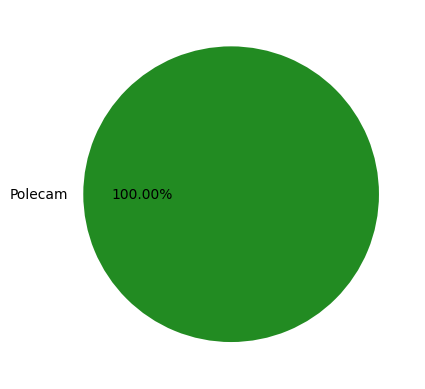

In [26]:
recommendation.plot.pie(
    label = "",
    labels = ["Nie polecam", "Polecam", "Nie mam zdania"],
    autopct = lambda x: f'{x:1.2f}%' if x>0 else '',
    colors = ["crimson", "forestgreen", "lightgray" ]
)